# Heart Atack

Data from Kaggle website:

https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset \

- Age : Age of the patient

- Sex : Sex of the patient

- exang: exercise induced angina (1 = yes; 0 = no)

- ca: number of major vessels (0-3)

- cp : Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
    - trtbps : resting blood pressure (in mm Hg)

- chol : cholestoral in mg/dl fetched via BMI sensor

- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- rest_ecg : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

- thalach : maximum heart rate achieved

- target : 
    - 0= less chance of heart attack
    - 1= more chance of heart attack

In [402]:
# Import library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [403]:
# Read csv file

df = pd.read_csv('heart.csv', sep=',')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [404]:
# Shape of DataFrame. There are 303 rows and 14 columns

df.shape

(303, 14)

In [405]:
# Check if there are any NaN data

df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [406]:
# Check if there are duplicated data

df_duplicated = df.loc[df.duplicated()]
df_duplicated

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [407]:
# Erase the duplicated data

df.drop_duplicates(inplace=True)

# Graphs - Part 1

In [408]:
print(f"Min age is: {df.min()['age']} and the max value is: {df.max()['age']}")

Min age is: 29.0 and the max value is: 77.0


# Histogram for ages

<AxesSubplot:xlabel='age', ylabel='Count'>

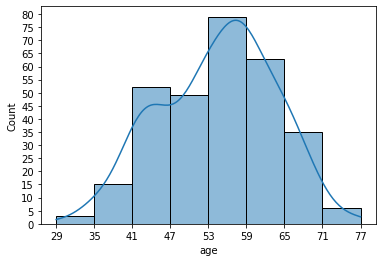

In [409]:
x_ticks = np.arange(29,78,6)
y_ticks = np.arange(0,81,5)

fig, ax = plt.subplots()

plt.yticks(y_ticks)
plt.xticks(x_ticks)
sns.histplot(data=df, x='age', bins=8, kde=True)

In [410]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<AxesSubplot:>

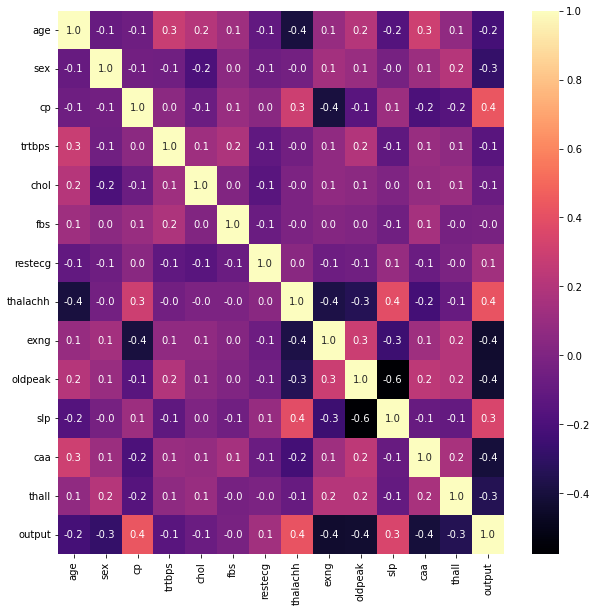

In [411]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f', cmap='magma')

# Data Analysis

In [412]:
# Import the library

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [413]:
# Split the data

prev = df.iloc[:, 0:-1]
aim = df.iloc[:, -1].values

In [414]:
# Transform a categorical data in numerical data - Not used

In [415]:
# Using OneHotEncoder to remove the weight of the some colums
# cp, restecg, slp, caa, thall
transf_data = ColumnTransformer(transformers=[('One', OneHotEncoder(),
                                             ['cp', 'restecg', 'slp', 'caa', 'thall'])],
                              remainder = 'passthrough').fit_transform(prev)

In [416]:
# Scale the data

trans_data_scale = StandardScaler().fit_transform(transf_data)

In [417]:
# Create a dataframe

df_trans_data = pd.DataFrame(trans_data_scale)

In [418]:
# Split Data in Test and Train classes

# Import the library
from sklearn.model_selection import train_test_split

In [419]:
# Split the data

x_train, x_test, y_train, y_test = train_test_split(df_trans_data, aim, test_size=0.3, random_state = 1)

In [420]:
x_train.shape

(211, 27)

In [421]:
x_test.shape

(91, 27)

In [422]:
y_train.shape

(211,)

In [423]:
y_test.shape

(91,)

## Naive Bayes

In [424]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score

In [425]:
model_naive = GaussianNB()

In [426]:
model_naive.fit(x_train, y_train)

GaussianNB()

In [427]:
predict_naive = model_naive.predict(x_test)

In [428]:
# Accuracy test

acc_naive = accuracy_score(y_test, predict_naive)
acc_naive

0.7692307692307693

In [429]:
confusion_matrix(y_test, predict_naive)

array([[28, 10],
       [11, 42]], dtype=int64)

In [430]:
print(classification_report(y_test, predict_naive))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73        38
           1       0.81      0.79      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.77      0.77        91



In [431]:
# Validação Cruzada
# Split the data in small groups

split_data = KFold(n_splits= 30, shuffle=True, random_state = 5)

In [432]:
# Create a model

new_model = GaussianNB()
cross_val_score(new_model, df_trans_data, aim, cv = split_data).mean()

0.8212121212121211

## SVM

In [433]:
# Import the library

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV as gsc

In [434]:
# 'linear', 'poly', 'rbf', 'sigmoid'
grid_param_svm = {'C':[1, 2, 3, 4, 5, 10],
                 'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
                 'gamma': ['auto', 'scale'],
                 'tol':[0.01, 0.001, 0.0001]}

In [435]:
grid_svm = gsc(SVC(), grid_param_svm, refit = True, verbose = 1,n_jobs=-1)

In [436]:
grid_svm.fit(x_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 10], 'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'tol': [0.01, 0.001, 0.0001]},
             verbose=1)

In [437]:
print(grid_svm.best_params_)

{'C': 2, 'gamma': 'auto', 'kernel': 'sigmoid', 'tol': 0.01}


In [438]:
svm_test = SVC(gamma='auto', kernel='sigmoid', random_state=42, C = 2, tol = 0.01)

In [439]:
svm_test.fit(x_train, y_train)

SVC(C=2, gamma='auto', kernel='sigmoid', random_state=42, tol=0.01)

In [440]:
predict_svm = svm_test.predict(x_test)

In [441]:
acc_svm = accuracy_score(y_test, predict_svm)
acc_svm

0.8021978021978022

In [442]:
# Cross Validation

k_fold_svm = KFold(n_splits=30,
                  shuffle = True,
                  random_state = 5)

In [443]:
# Create a model

model_svm = SVC()
cross_val_score(model_svm, df_trans_data, aim, cv=k_fold_svm).mean()

0.8206060606060605

In [444]:
predic_train = grid_svm.predict(x_train)

In [445]:
accuracy_score(y_train, predic_train)

0.8530805687203792

# Logistic Regression

In [446]:
# Import the library

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV as gsc

In [447]:
# Applying GridSearchCV

In [448]:
grid_param_logistic = {'penalty': ['l1','l2'],
       'tol':[0.01, 0.001, 0.0001],
       'C': [1, 2, 3, 4, 5],
       'solver':['lbfgs', 'liblinear', 'newton-cg'],
       'max_iter': [100, 200, 1000],
        'random_state': [42]}

In [449]:
grid_logistic = gsc(LogisticRegression(), grid_param_logistic,
           verbose = 1, n_jobs=-1)

In [450]:
grid_logistic.fit(x_train, y_train)
print(grid_logistic.best_params_)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
{'C': 4, 'max_iter': 100, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.01}


C:\Users\harle\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
450 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\harle\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\harle\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\harle\AppData\Roaming\Python\Python39\site-packages\sklearn\linea

In [451]:
# Create a variable and call the function

logistic_test = LogisticRegression(C=4, max_iter=100, penalty='l1', solver= 'liblinear', tol= 0.001)

In [452]:
#Input the x_train and y_train

logistic_test.fit(x_train, y_train)

LogisticRegression(C=4, penalty='l1', solver='liblinear', tol=0.001)

In [453]:
# Check the intercept

logistic_test.intercept_

array([-0.08013275])

In [454]:
# Check the coefficient

logistic_test.coef_

array([[-1.18956158,  0.        ,  0.24250037,  0.15152235, -0.34227503,
         0.        ,  0.        ,  0.27802862, -0.63191261,  0.        ,
         0.75913244, -0.50823085, -0.88372922,  0.02041463,  0.03457546,
        -0.12133412,  0.20030632,  0.        , -0.45093801,  0.41086434,
        -1.53262355, -0.68270475, -0.30413234,  0.22831607,  1.42734299,
        -0.56460864, -0.67457397]])

In [455]:
# Create a variable to predict the function

predict_logistic = logistic_test.predict(x_test)

In [456]:
# Check the results
# Accuracy
acc_logis = accuracy_score(y_test, predict_logistic)
acc_logis

0.8241758241758241

In [457]:
# Confusion matrix
confusion_matrix(y_test, predict_logistic)

array([[32,  6],
       [10, 43]], dtype=int64)

In [458]:
# Classsification report

print(classification_report(y_test, predict_logistic))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        38
           1       0.88      0.81      0.84        53

    accuracy                           0.82        91
   macro avg       0.82      0.83      0.82        91
weighted avg       0.83      0.82      0.83        91



In [459]:
# Predict the data with x_train

predict_logistic_train = logistic_test.predict(x_train)

In [460]:
# Accuracy
accuracy_score(y_train, predict_logistic_train)

0.9004739336492891

In [461]:
# Cross Validation

# Split data in small groups
kfold_logistic = KFold(n_splits=20,
                      shuffle = True,
                      random_state= 5)

In [462]:
model_logistic = LogisticRegression()

In [463]:
cross_val_score(model_logistic, df_trans_data, aim, cv = kfold_logistic).mean()

0.8441666666666666